### 목표: 무게에 따른 길이 예측 모델
- 데이터 : fish.csv
- feature: Weight
- target : length


1. 모듈 로딩, 데이터 준비

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np

fish = pd.read_csv('../data/fish.csv', usecols=[0,1,2])
fish.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [34]:
#학습에 사용할 데이터 추출하기: perch 행

perch = fish[fish.Species == 'Perch']

#인덱스 정리
perch.reset_index(drop = True, inplace=True)

In [35]:
#수치 컬럼의 데이터 정보 확인
perch.describe()

,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


3. 데이터 전처리 <hr>
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포, 최빈값, 고유값 <- 산점도, 히스토그램

3-1. 데이터 분포

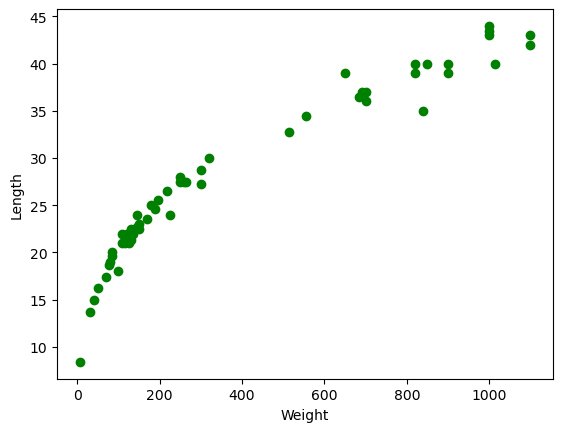

In [36]:
#무게 - 길이 시각화

plt.plot(perch.Weight, perch.Length, 'go')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [37]:
# 무게 - 길이 상관계수
perch.corr(numeric_only=True)

#강한 상관관계, 양의 상관관계.

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [38]:
# [ 분석결과 ] 무게에 따른 길이는 비례관계
# 무게 + 연산 --> 길이

perch.iloc[:2]

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7


In [39]:
md = (perch.Weight * 1/5) + 7
md[:3]

0     8.18
1    13.40
2    15.00
Name: Weight, dtype: float64

In [40]:
(perch.Length - md).abs().sum()

3112.12

4. 학습 진행 <hr>
- 방법 : 지도 + 회귀 (예측) -> 선형 회귀(regression)
- 

In [41]:
# 모델 인스턴스 생성
md = LinearRegression()

In [42]:
md.fit(perch[['Weight']], perch['Length'])

LinearRegression()

In [43]:
print(f' 피처에 활당되는 가중치 : {md.coef_}')
print(f' 수식에 사용되는 절편 : {md.intercept_}')

 피처에 활당되는 가중치 : [0.02487985]
 수식에 사용되는 절편 : 18.382802913636723


In [46]:
(perch.Weight * md.coef_ + md.intercept_)

0     18.529594
1     19.178958
2     19.377997
3     19.664115
4     20.124392
5     20.870787
6     20.323431
7     20.373191
8     20.497590
9     20.497590
10    21.119586
11    21.243985
12    21.492784
13    21.617183
14    21.368384
15    21.368384
16    21.617183
17    21.741582
18    21.119586
19    21.617183
20    22.114780
21    21.990380
22    22.114780
23    22.612377
24    23.980768
25    21.990380
26    23.060214
27    22.861175
28    23.284132
29    23.806609
30    25.846756
31    24.851563
32    24.975962
33    24.602764
34    24.602764
35    25.846756
36    26.344353
37    31.171043
38    32.215997
39    39.281873
40    35.425497
41    35.798695
42    35.798695
43    35.549896
44    40.774664
45    34.554702
46    38.784276
47    39.530671
48    40.774664
49    43.635846
50    38.784276
51    45.750633
52    43.262648
53    45.750633
54    43.262648
55    43.262648
Name: Weight, dtype: float64


5, test


In [47]:
#결정계수 R2 : 얼마나 정답에 가깝게 결과를 예측해내는지를 나타내는 계수값
#범위는 0.0 ~ 1.0
#1에 가까울수록 잘 만들어진 모델
md.score(perch[['Weight']], perch['Length'])

0.919021073244782

In [50]:
y_pre = md.predict(perch[['Weight']])

In [53]:
np.round(y_pre, 1) - perch.Length

0     10.1
1      5.5
2      4.4
3      3.5
4      2.7
5      2.9
6      1.6
7      1.4
8      0.9
9      0.5
10     0.1
11     0.2
12     0.5
13     0.3
14    -0.6
15    -0.6
16    -0.4
17    -0.3
18    -0.9
19    -0.9
20    -0.4
21    -0.7
22    -0.9
23    -0.9
24     0.0
25    -2.0
26    -1.5
27    -2.1
28    -2.3
29    -2.7
30    -1.5
31    -2.6
32    -2.5
33    -2.9
34    -3.4
35    -2.9
36    -3.7
37    -1.6
38    -2.3
39     4.3
40    -1.1
41    -0.2
42    -1.2
43    -1.5
44     1.8
45    -4.4
46    -0.2
47    -0.5
48     0.8
49     3.6
50    -1.2
51     3.8
52     0.3
53     2.8
54    -0.2
55    -0.7
Name: Length, dtype: float64

In [ ]:
md.score(perch[['Weight']], perch.Length)

In [ ]:
y_pre = md.predict(perch[['Weight']])
y_pre = np.round(y_pre,1)
y_pre

In [ ]:
# 오차 계산 => 예측값 - 정답
errorSR = y_pre - perch.Length
errorSR

In [ ]:
np.round(y_pre,1), perch.Length

In [ ]:
(errorSR**2).sum() / errorSR.shape[0] # 분산

In [ ]:
# 정답과 완벽히 똑같은 갯수 찾기
errorSR[(y_pre-perch.Length) == 0.0]

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

6. 성능 평가 <hr>
- 결정 계수값 : 1.0에 가까울수록 좋음
- 오차 평균값 : 낮은 값일수록 좋음. 
- 활용 모듈   : sklearn. metrics

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sklearn

print(sklearn.__version__)

1.3.0


In [56]:
#결정계수값
r2_score(perch.Length, y_pre)

0.919021073244782

In [57]:
#평균제곱오차:MSE
mean_squared_error(perch.Length, y_pre)

6.473219904872075

In [60]:
#루트평균제곱오차: MSE
mean_squared_error(perch.Length, y_pre, squared=False)

2.5442523272804674

In [58]:
#평균절댓값오차
mean_absolute_error(perch.Length, y_pre)

1.851505000314426